In [1]:
import numpy as np
from pylab import *
import scipy.fftpack as fft
from scipy.linalg import norm
import matplotlib.pyplot as plt
from scipy.integrate import quad
plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (20,8)
plt.rcParams['font.size'] = 30
plt.rcParams['legend.fontsize'] = 30

 Q1. Show that for the normal probability distribution is described by the Gaussian function
 $$\Large \displaystyle{\lim_{\sigma \to 0} \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2 {\sigma}^2}} = \delta(x-\mu)} $$ where $\mu$ is the mean and $\sigma$ the standard deviation:  $$\int \cos x\delta(x-\mu) dx = -1$$
 where $\mu = \pi$

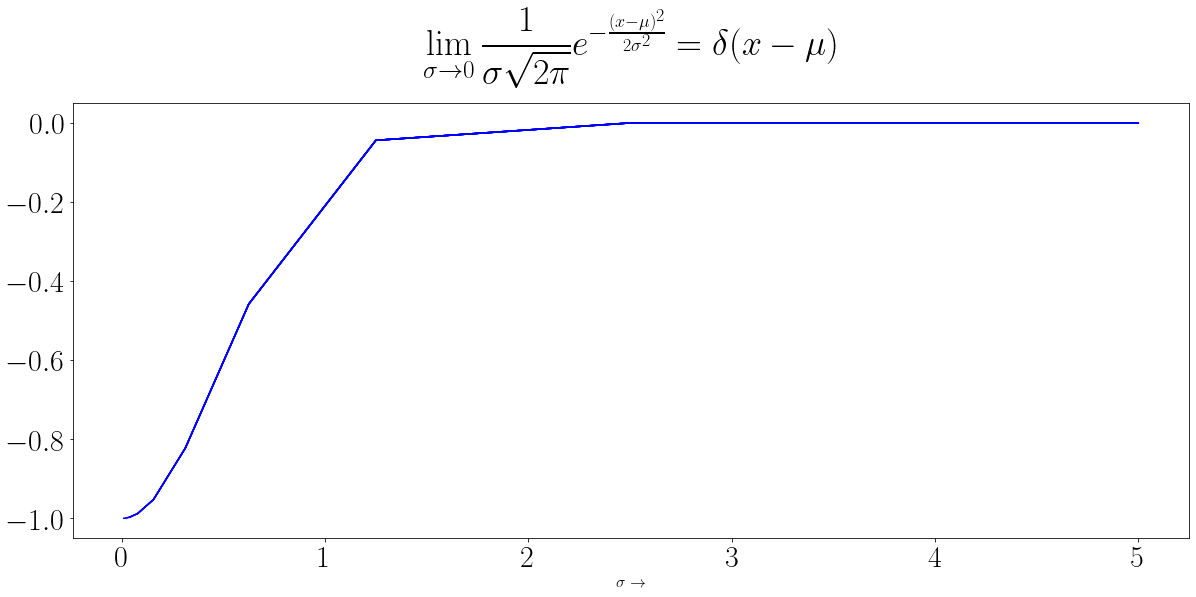

In [2]:
sigma=10
E,s=[],[]

def f(x):
    return np.cos(x)*(1/(sigma*(2*np.pi)**0.5))*np.exp(-(x-np.pi)**2/(2*(sigma)**2))

for i in range(10):
    a=quad(lambda x:f(x),np.pi-5*(sigma),np.pi+5*(sigma),limit=200)[0]
    sigma=sigma*0.5
    E.append(a)
    s.append(sigma)
    plt.plot(s,E,'b-')
    plt.xlabel(r'$ \sigma \rightarrow $',fontsize=16)
plt.title(r'${\displaystyle\lim_{\sigma\to0}\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2{\sigma}^2}}=\delta(x-\mu)}$',y=1.1)    
plt.show()

 Q2. Show that $\large\displaystyle{\lim_{\epsilon \to 0} \frac{1}{\pi}(\frac{\epsilon}{x^2 + \epsilon^2}) = \delta(x)} $ by applying it on two functions of $x$.

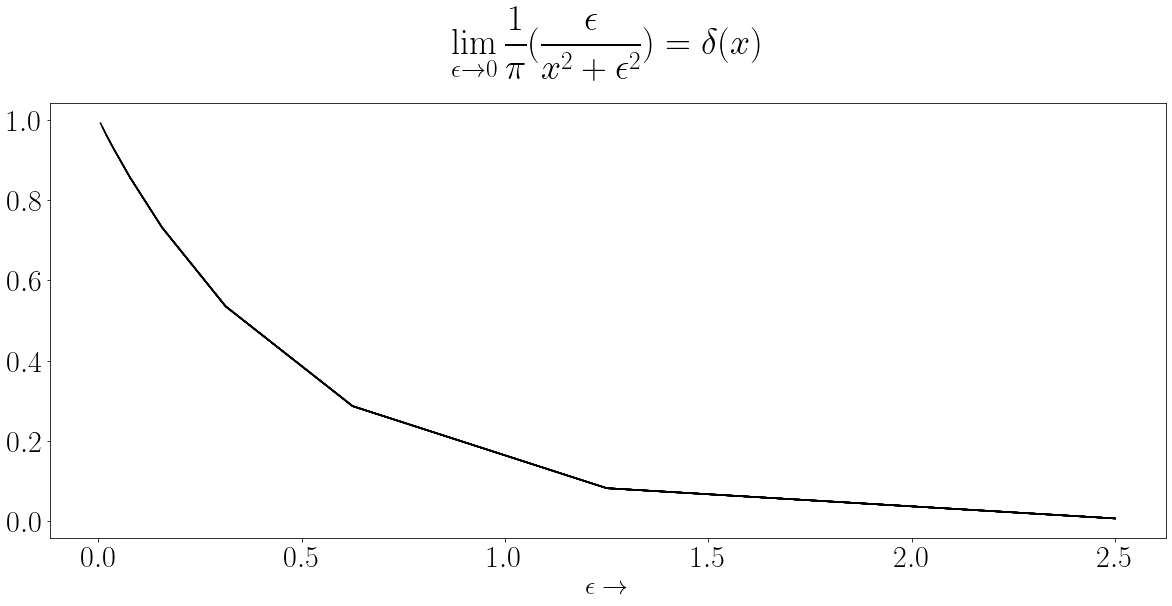

In [3]:
E=5
A,s = [],[]

def f(x):
    return np.cos(x)*(1/np.pi)*(E/(x**2+E**2))

for i in range(10):
    a=quad(lambda x:f(x),-150*E,150*E,limit=500)[0]
    E=E*0.5
    A.append(a)
    s.append(E)
    plt.plot(s,A,'k-')
    plt.xlabel(r'$ \epsilon \rightarrow $',fontsize=26)
plt.title(r'$\displaystyle{\lim_{\epsilon \to 0} \frac{1}{\pi}(\frac{\epsilon}{x^2 + \epsilon^2}) = \delta(x)} $',y=1.1)
plt.show()

 Q3. Plot the following function in the domain $(-4\pi \le x \le 4\pi) :$ $ \\ $ $$\large f(x)=\tan^{-1}x \textrm{  for  } 0\le x <2\pi \textrm{  and  } f(x+2\pi)=f(x)$$ $\\ $
     Reconstruct this function with its **Fourier Components**.

In [4]:
f=lambda x: np.arctan(x%(2*np.pi))

x=np.arange(-5*np.pi,5*np.pi,0.0001)

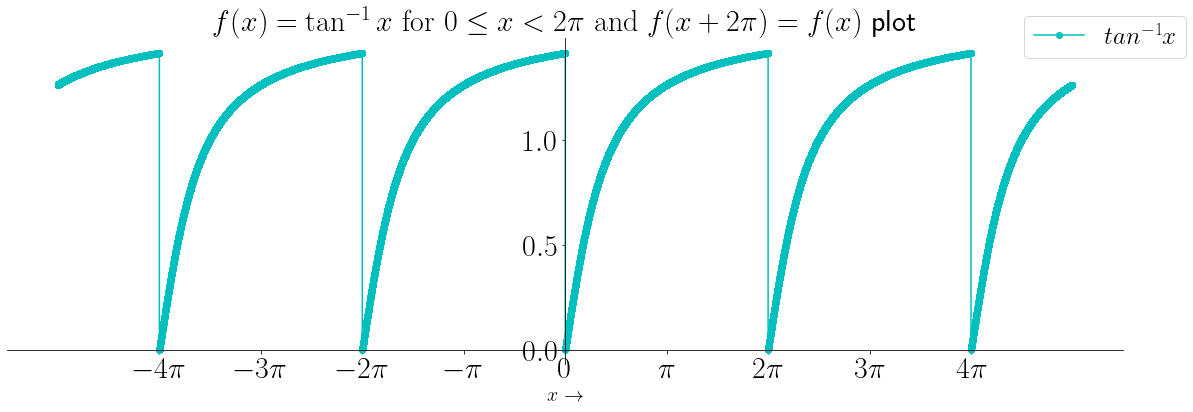

In [5]:
q1=[(-4*np.pi),(-3*np.pi),(-2*np.pi),(-np.pi),0,np.pi,(2*np.pi),(3*np.pi),(4*np.pi)]
q2=[r'${-4\pi}$',r'${-3\pi}$',r'${-2\pi}$',r'${-\pi}$',r'$0$',r'${\pi}$',r'${2\pi}$',r'${3\pi}$',r'${4\pi}$']

fig = plt.figure(figsize=(20,6))
a = fig.add_subplot(111)
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
ax.plot(x,f(x),'co-')
ax.legend(['$tan^{-1} x$'],bbox_to_anchor=(0.9, 0.9),fontsize=25)
xlim(1.1*x.min(), 1.1*x.max())
xticks(q1,q2, fontsize=30)
xlabel(r'$ x \rightarrow $', fontsize=20)
plt.title(r'$f(x)=\tan^{-1}x \textrm{  for  } 0\le x <2\pi\textrm{  and  } f(x+2\pi)=f(x)$ plot',fontsize=30)
plt.show()

## For a function of fourier
## $$ \displaystyle{f(x) = \frac{a_o}{2} + \sum_{n=1}^\infty a_n \cos nx + \sum_{n=1}^\infty b_n \sin nx }$$
## where,
## $ \displaystyle{\qquad a_o = \frac{1}{2\pi} \int_{0}^{2\pi} f(x) \text{ d}x }$

## $ \displaystyle{\qquad a_n = \frac{1}{\pi} \int_{0}^{2\pi} f(x) \cos nx \text{ d}x }$

## $ \displaystyle{\qquad b_n = \frac{1}{\pi} \int_{0}^{2\pi} f(x) \sin nx \text{ d}x \text{ for n = 1,2,3,4.....}}$

In [6]:
def fft_plot(x,y,maxn):
    
    def ff(f,x,maxn):
        Ao=(1/(2*np.pi))*quad(lambda x:f(x),0,2*np.pi,limit=200)[0]
        A,B=[0],[0]

        for n in range(1,maxn):
            An=1/(np.pi)*quad(lambda x:np.cos(n*x)*f(x),0,2*np.pi,limit=200)[0]
            A.append(An)
            Bn=1/(np.pi)*quad(lambda x:np.sin(n*x)*f(x),0,2*np.pi,limit=200)[0]
            B.append(Bn)    
    
        for n in range(maxn):
            Ao=Ao+A[n]*np.cos(n*x)+B[n]*np.sin(n*x)
        return Ao
    
    for n in maxn:
        Y = ff(f,x,n)
        fig = plt.figure(figsize=(20,8))
        a = fig.add_subplot(111)
        ax = gca()
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.xaxis.set_ticks_position('bottom')
        ax.spines['bottom'].set_position(('data',0))
        ax.yaxis.set_ticks_position('left')
        ax.spines['left'].set_position(('data',0))    
        ax.plot(x,y,'ro-',x,Y,'g-.')
        xlim(1.1*x.min(), 1.1*x.max())
        xticks(q1,q2, fontsize=30)
        xlabel(r'$ x \rightarrow $', fontsize=20)
        ax.legend(['analytic $tan^{-1} x$', "approximate"],bbox_to_anchor=(0.9, 0.8),fontsize=30)
        plt.title(r'Fourier components of $\displaystyle\tan^{-1} x $  plot for $%0.f$ itterations'%(n),fontsize=40,y=1.1)
    plt.show()
    return ax

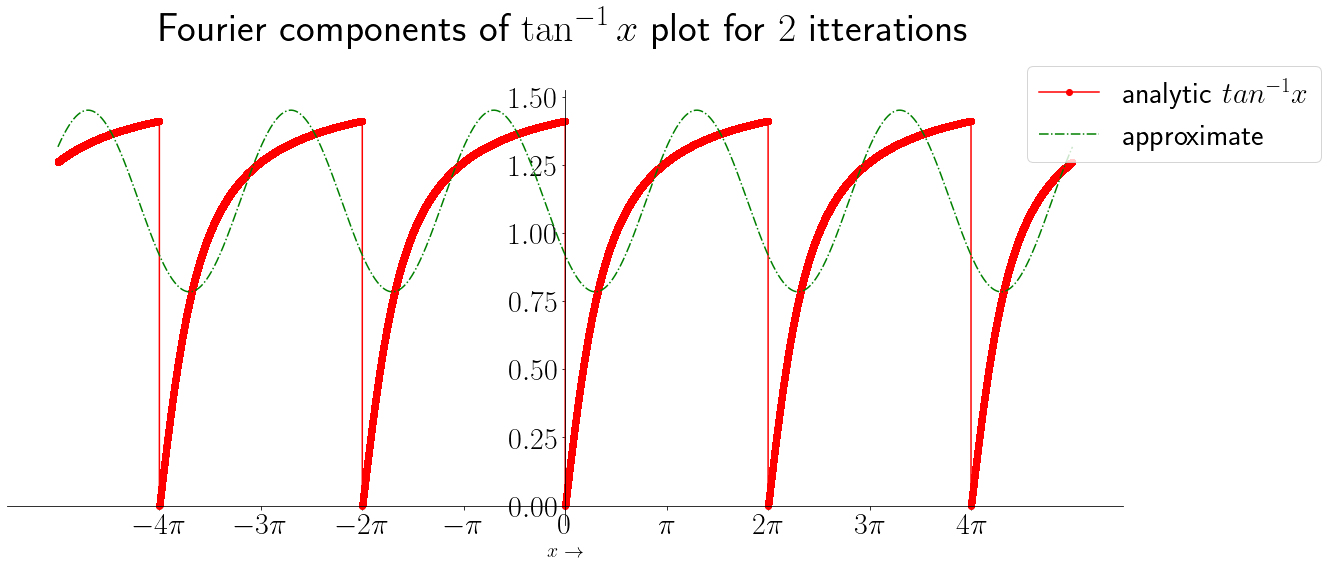

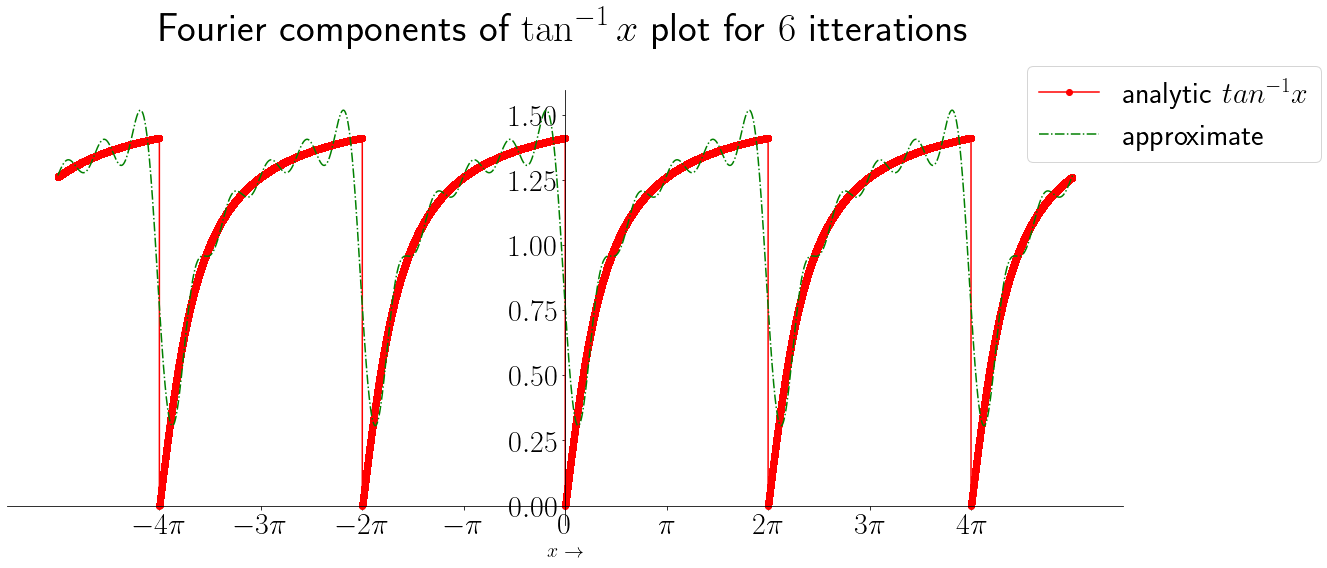

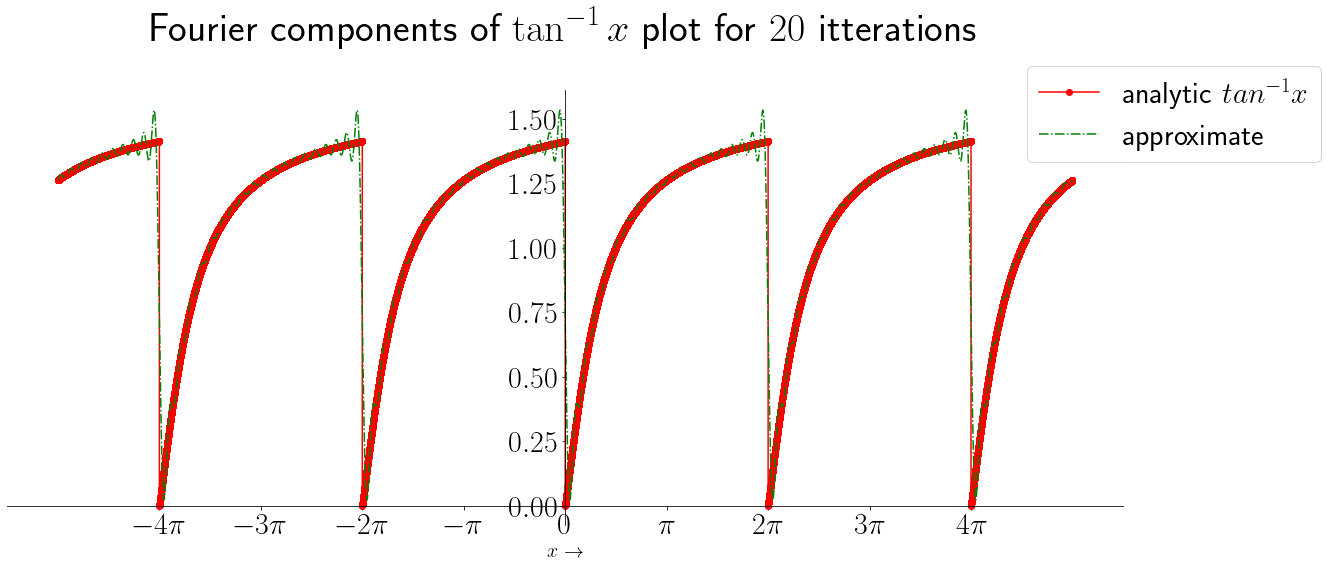

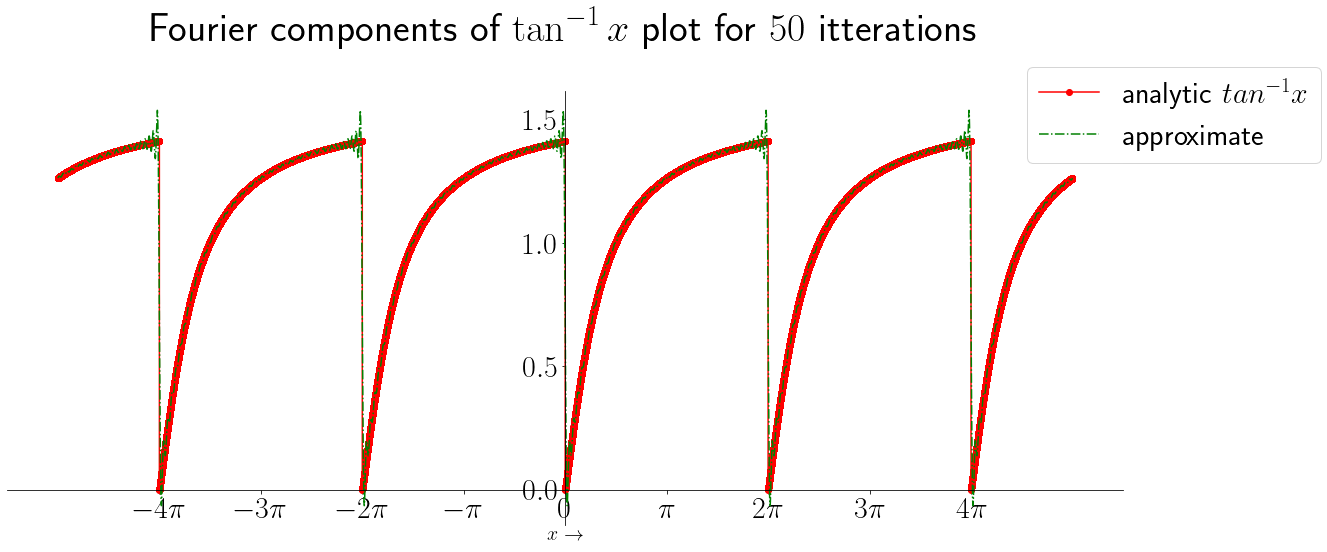

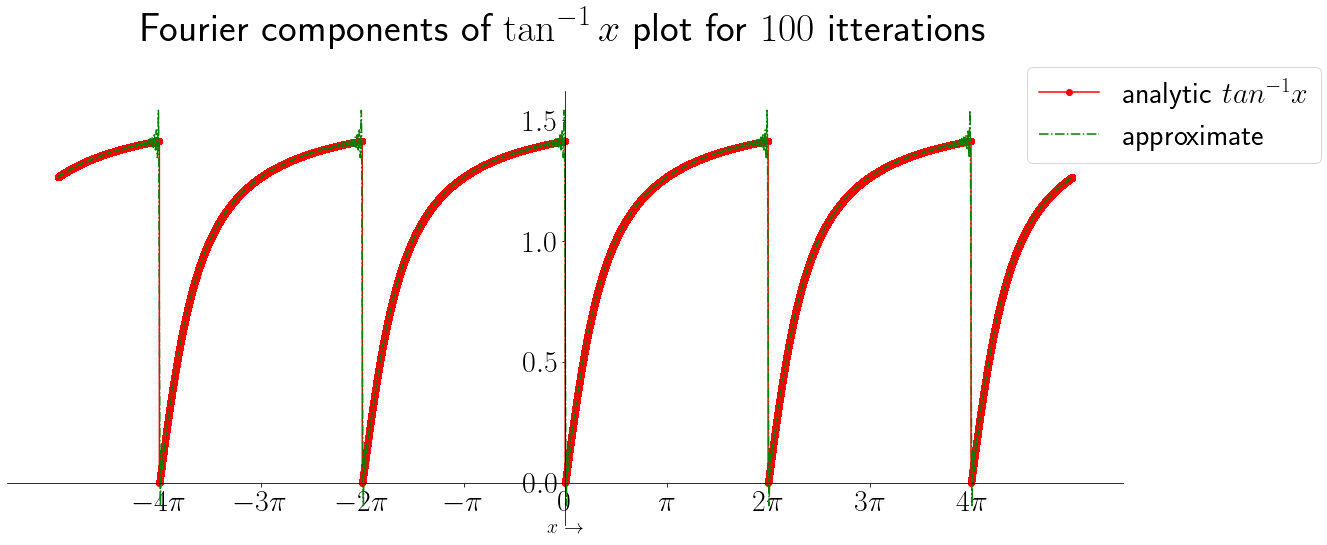

In [7]:
maxn=[2,6,20,50,100]
fft_plot(x,f(x),maxn)
show()

$\text{Comments : We see on increasing the no. of intervals the fourier plot matches the graph plot ,} $

$\qquad \qquad \text{ but we observe that there's a flux gathered at the top-right-end of the plot wihich is the Gaussian flux.}$

Q4. Plot the Fourier integral of the function:
$$ f(x)=x\exp{(-\frac{x^2}{2\sigma^2})}$$

Plot the imaginary part as a function of $k$ for three values of $\sigma$.

Show that as increases the momentum uncertainty decreases. Also show that the real parts are zero in all cases.

Real part norm for sigma_{0} is : 0.0
Real part norm for sigma_{1} is : 0.0
Real part norm for sigma_{2} is : 0.0


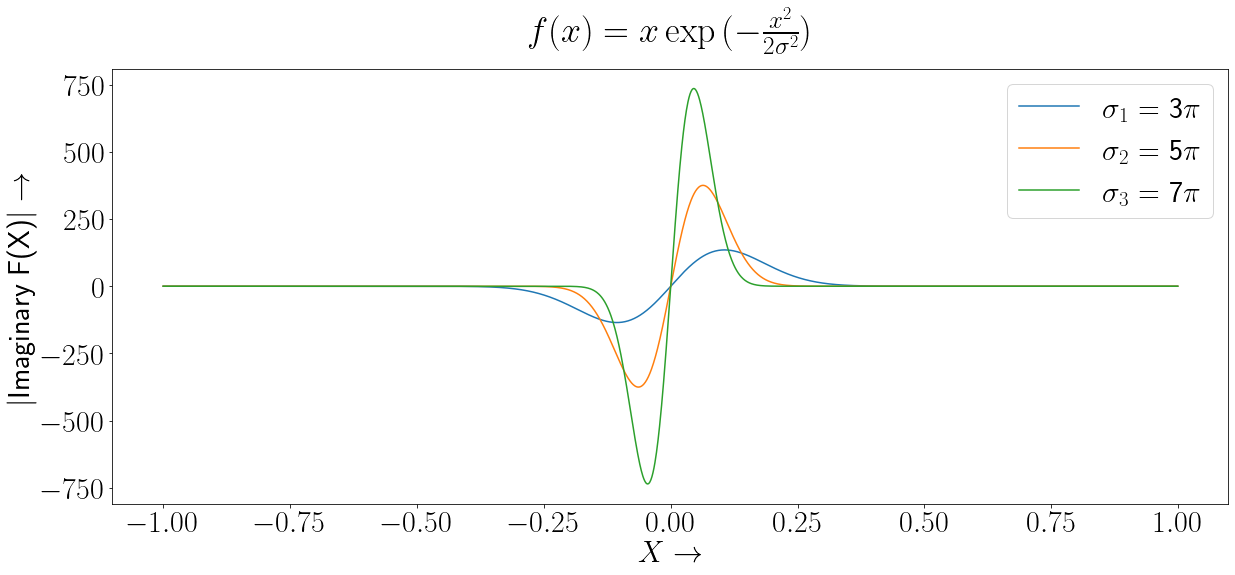

In [8]:
def f(x,k,s):
    return x*np.exp(-(x**2/(2*s**2)))*np.cos(k*x)

def g(x,k,s):
    return x*np.exp(-(x**2/(2*s**2)))*np.sin(k*x)

k=np.arange(-1,1,0.001)
sigma=np.pi*np.array([3, 5, 7])

Real=[[quad(f,-np.inf,np.inf,limit=1000,args=(i,j))[0] for i in k] for j in sigma]
Imag=[[quad(g,-np.inf,np.inf,limit=1000,args=(i,j))[0] for i in k] for j in sigma] 

for i in range(len(sigma)):
    print(r'Real part norm for sigma_{%i} is :'%(i),norm(Real[i]))
    plt.plot(k,Imag[i],label='$\sigma_{%i}$ = %i$\pi$'%(i+1,sigma[i]/np.pi))
plt.xlabel(r"$X \rightarrow$")
plt.ylabel(r"$|$Imaginary F(X)$| \rightarrow$")
plt.legend()
plt.title(r'$ f(x)=x\exp{(-\frac{x^2}{2\sigma^2})}$',y=1.05)    
plt.show()

Q5. Calculate the Fourier integral of the following functions and the then plot the power spectrum, $ | \textrm{Fourier Transformation}|^2$ as a function of frequency :

a) $f(x)=\left\{\begin{array}{rl}\sin x & \textrm{ for } 0\le x\le a,\\ 0 & \textrm{ elsewhere } \end{array} \right.$
             (Repeat the problem for a= 1, 3, 5). Put comments about your observations on the effect of increasing $a$.
             
b) $f(x)=\sin x +\sin 2x$   

c) $f(x)=\left\{\begin{array}{rl}\sin x & \textrm{ for } x<0,\\ \sin 2x & \textrm{ for } x \ge 0 \end{array} \right. \qquad$
     (Comment on the differences between the power spectrum of case (b) and (c)

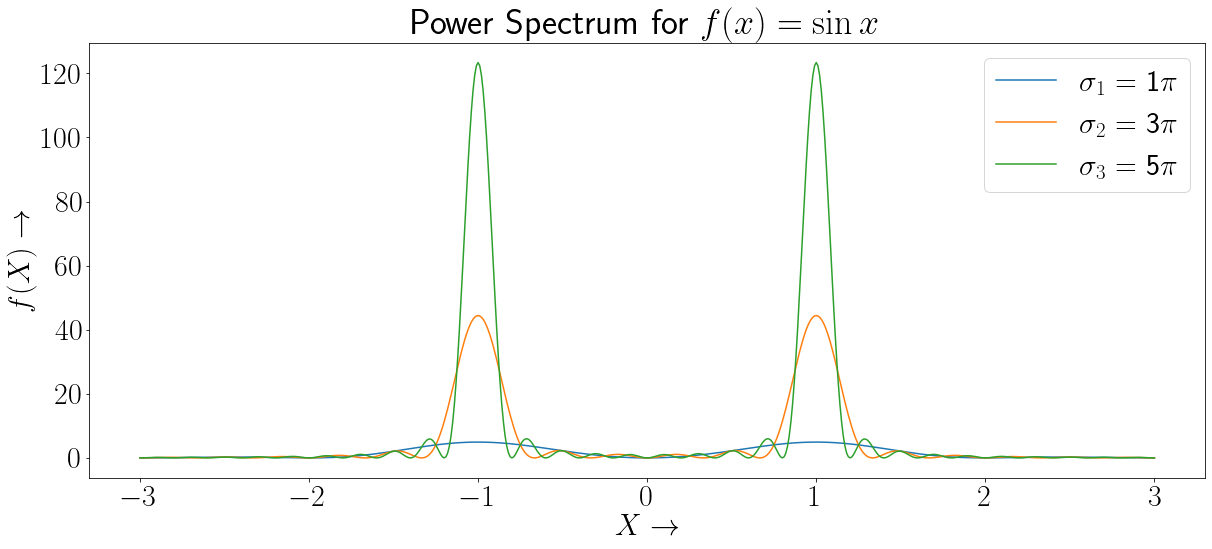

In [9]:
def f1_sin(x,t):
    return np.sin(x)*np.sin(x*t)

def f1_cos(x,t):
    return np.cos(x)*np.cos(x*t)

T=np.linspace(-3,3,601)
sigma=np.pi*np.array([1, 3, 5])

yr1=[[quad(f1_cos,0,i,args=(t),limit=500)[0] for t in T] for i in sigma]
yi1=[[quad(f1_sin,0,i,args=(t),limit=500)[0] for t in T] for i in sigma]
y1=[[yr1[i][t]**2 + yi1[i][t]**2 for t in range(len(T))] for i in range(len(sigma))]

for i in range(len(sigma)):
    plt.plot(T,y1[i], label='$\sigma_{%i}$ = %i$\pi$'%(i+1,sigma[i]/np.pi))
plt.xlabel(r"$X \rightarrow$")
plt.ylabel(r"$f(X) \rightarrow$")
plt.legend()
plt.title(r'Power Spectrum for $f(x)=\sin x$') 
plt.show()

$\text{Comments : The peak in the power spectrum increases with each amplitude increase.}$

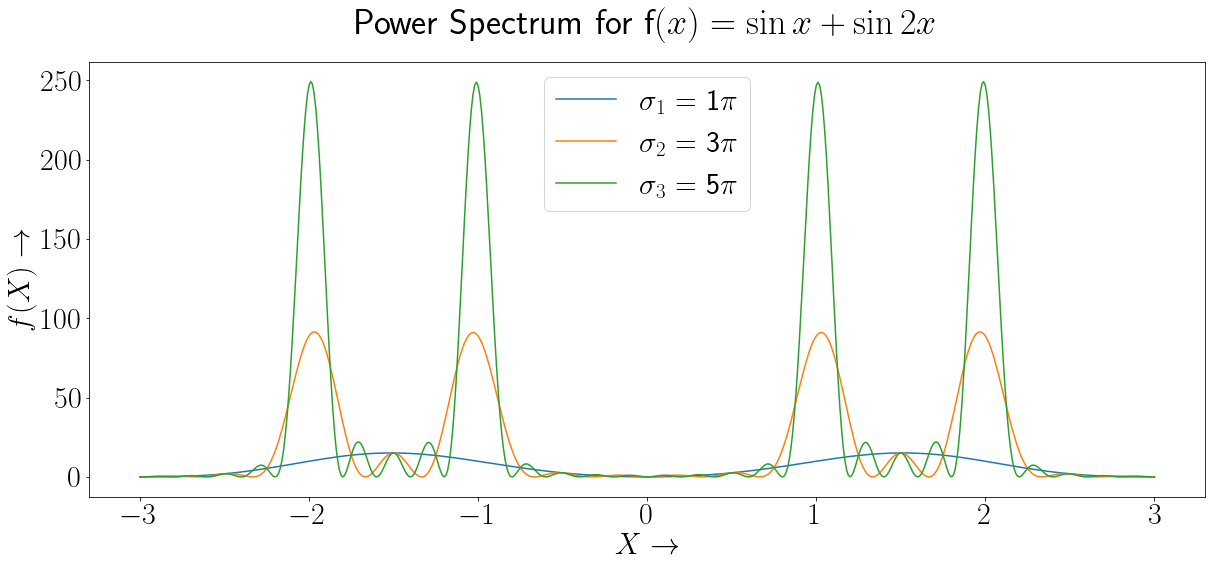

In [10]:
def f2_sin(x,t):
    return (np.sin(x) + np.sin(2*x))*np.sin(x*t)

def f2_cos(x,t):
    return (np.sin(x) + np.sin(2*x))*np.cos(x*t)

T=np.linspace(-3,3,601)
sigma=np.pi*np.array([1., 3., 5.])

yr2=[[quad(f2_cos,-i,i,args=(t),limit=500)[0] for t in T] for i in sigma] 
yi2=[[quad(f2_sin,-i,i,args=(t),limit=500)[0] for t in T] for i in sigma]
y2=[[yr2[i][t]**2 + yi2[i][t]**2 for t in range(len(T))] for i in range(len(sigma))]

for i in range(len(sigma)):
    plt.plot(T,y2[i],label='$\sigma_{%i}$ = %i$\pi$'%(i+1,sigma[i]/np.pi))
plt.xlabel(r"$X \rightarrow$")
plt.ylabel(r"$f(X) \rightarrow$")
plt.legend()
plt.title(r'Power Spectrum for f$(x)=\sin x + \sin 2x$',y=1.05) 
plt.show()

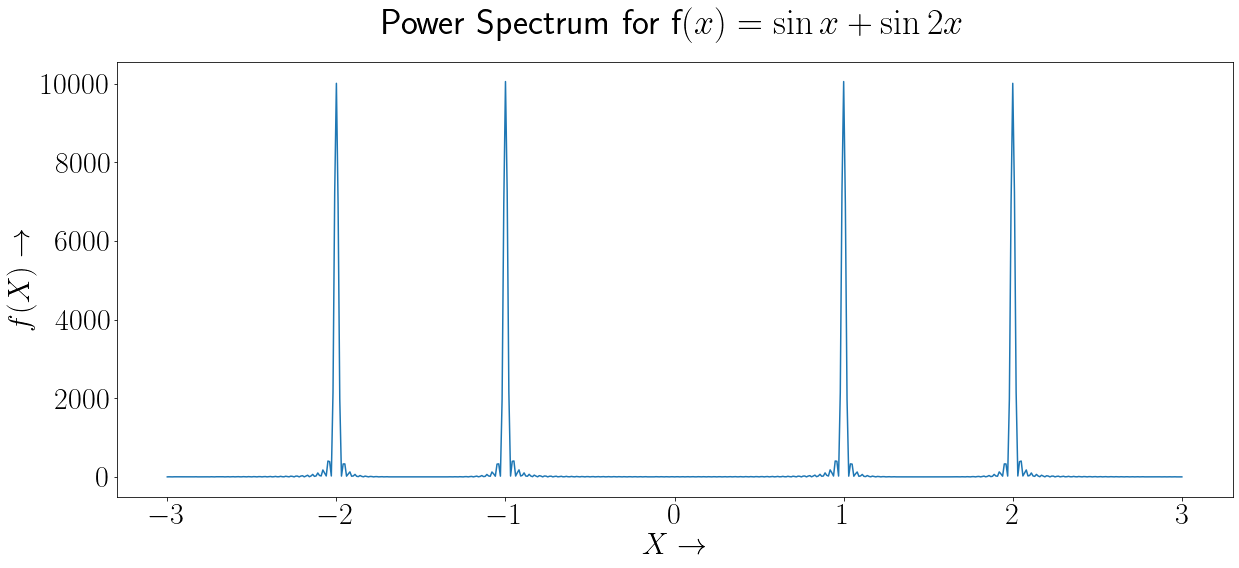

In [11]:
def f2_sin(x,t):
    return (np.sin(x) + np.sin(2*x))*np.sin(x*t)

def f2_cos(x,t):
    return (np.sin(x) + np.sin(2*x))*np.cos(x*t)

N=100
T=np.linspace(-3,3,601)

yr2=[quad(f2_cos,-N,N,args=(t),limit=500)[0] for t in T] 
yi2=[quad(f2_sin,-N,N,args=(t),limit=500)[0] for t in T] 
y2=[yr2[t]**2 + yi2[t]**2 for t in range(len(T))] 

plt.plot(T,y2)
plt.xlabel(r"$X \rightarrow$")
plt.ylabel(r"$f(X) \rightarrow$")
plt.title(r'Power Spectrum for f$(x)=\sin x + \sin 2x$',y=1.05) 
plt.show()

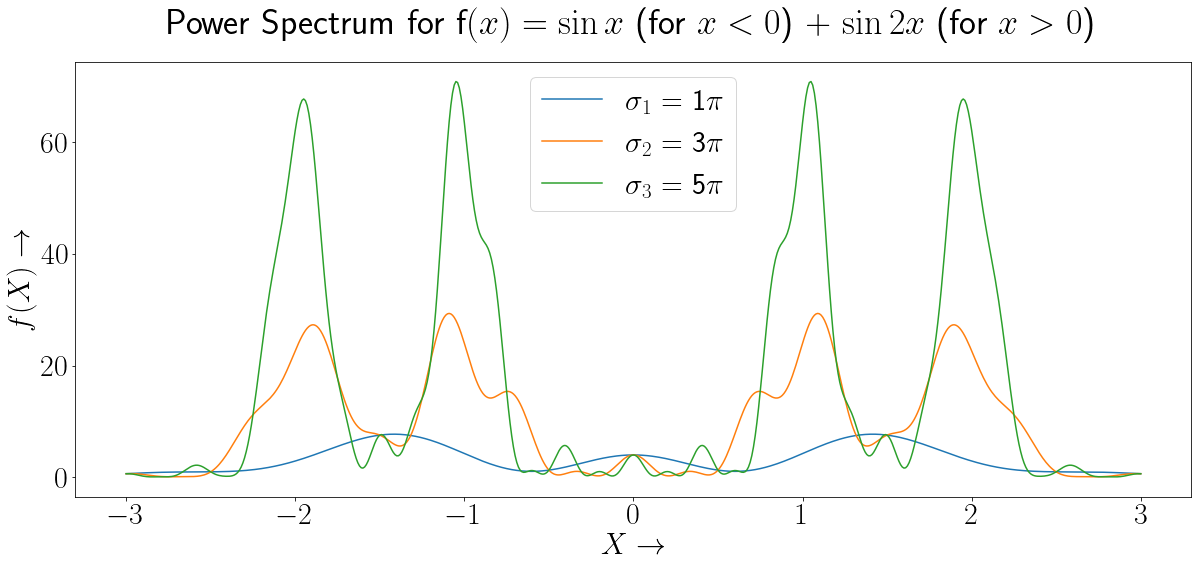

In [12]:
def f3_sin(x,t):
    return (np.sin(x)*(x<0) + np.sin(2*x)*(x>0))*np.sin(x*t)

def f3_cos(x,t):
    return (np.sin(x)*(x<0) + np.sin(2*x)*(x>0))*np.cos(x*t)

T=np.linspace(-3,3,601)
sigma=np.pi*np.array([1., 3., 5.])

yr3=[[quad(f3_cos,-i,i,args=(t),limit=500)[0] for t in T] for i in sigma] 
yi3=[[quad(f3_sin,-i,i,args=(t),limit=500)[0] for t in T] for i in sigma]
y3=[[yr3[i][t]**2 + yi3[i][t]**2 for t in range(len(T))] for i in range(len(sigma))]

for i in range(len(sigma)):
    plt.plot(T,y3[i],label='$\sigma_{%i}$ = %i$\pi$'%(i+1,sigma[i]/np.pi))
plt.xlabel(r"$X \rightarrow$")
plt.ylabel(r"$f(X) \rightarrow$")
plt.legend()
plt.title(r'Power Spectrum for f$(x)=\sin x$ (for $x<0$) + $\sin 2x$ (for $x>0$)',y=1.05)
plt.show()

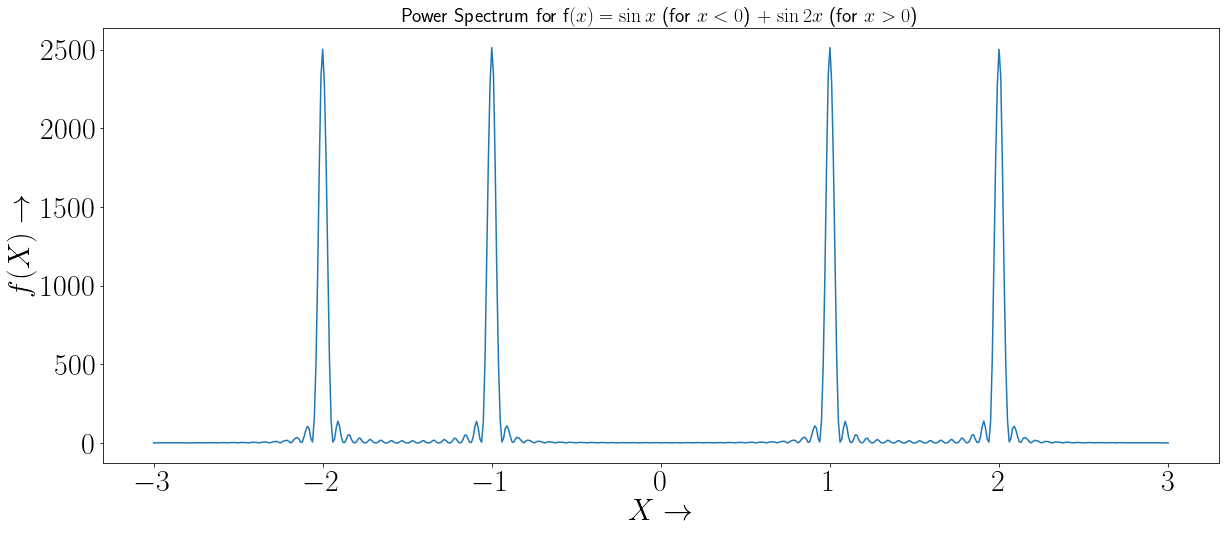

In [13]:
def f3_sin(x,t):
    return (np.sin(x)*(x<0) + np.sin(2*x)*(x>0))*np.sin(x*t)

def f3_cos(x,t):
    return (np.sin(x)*(x<0) + np.sin(2*x)*(x>0))*np.cos(x*t)

N=100
T=np.linspace(-3,3,601)

yr3=[quad(f3_cos,-N,N,args=(t),limit=500)[0] for t in T] 
yi3=[quad(f3_sin,-N,N,args=(t),limit=500)[0] for t in T] 
y3=[yr3[t]**2 + yi3[t]**2 for t in range(len(T))] 

plt.plot(T,y3)
plt.xlabel(r"$X \rightarrow$")
plt.ylabel(r"$f(X) \rightarrow$")
plt.title(r'Power Spectrum for f$(x)=\sin x$ (for $x<0$) + $\sin 2x$ (for $x>0$)',fontsize=20)
plt.show()

$\text{Comments : (c) has more higher diffracted order than (b), whereas (b) has more higher peaks than (c)}$

Q6. Calculate the FFT of a signal $ F(t)=\sin 50t.$ Change the sampling frequency and sampling time and see the effect on the power spectrum.                                                                                                         
       Do you see your observations in conformation with sampling theorem? You should be able to plot the abscissa of your power spectrum.

sampling : 16 |	freq res. : 0.09999999999999999 |	maxn. frequency : 1.5999999999999999


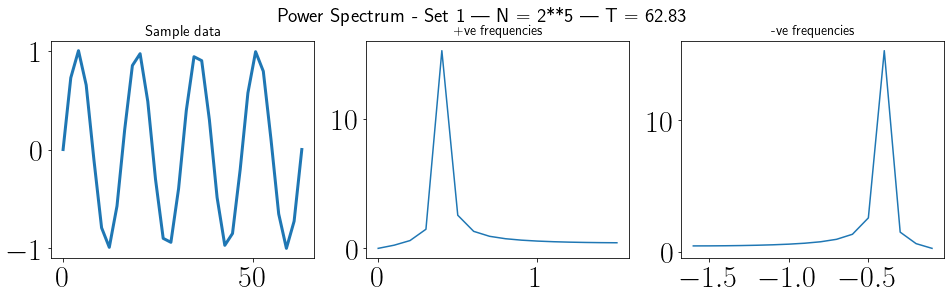

sampling : 128 |	freq res. : 0.06281407035175879 |	maxn. frequency : 8.040201005025125


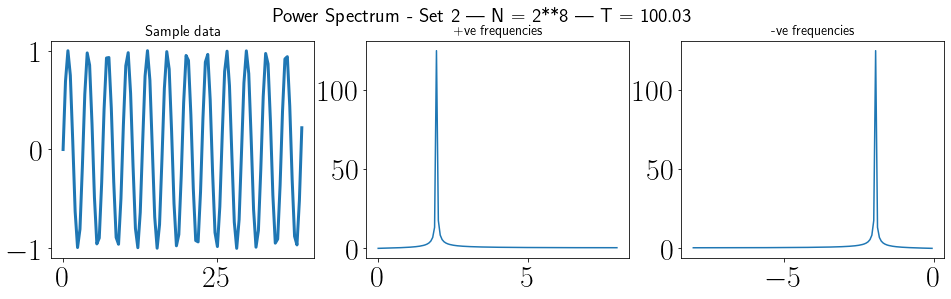

sampling : 2048 |	freq res. : 0.06249999999999999 |	maxn. frequency : 127.99999999999999


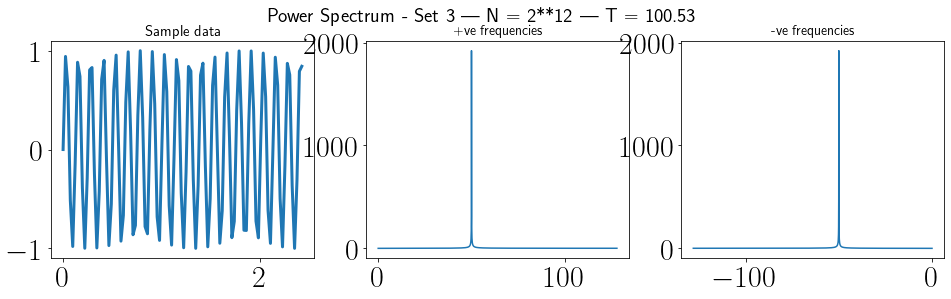

sampling : 64 |	freq res. : 1.9999999999999998 |	maxn. frequency : 127.99999999999999


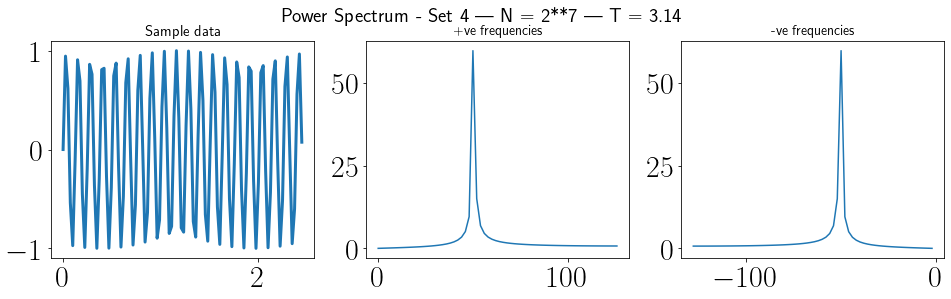

sampling : 128 |	freq res. : 0.22222222222222218 |	maxn. frequency : 28.44444444444444


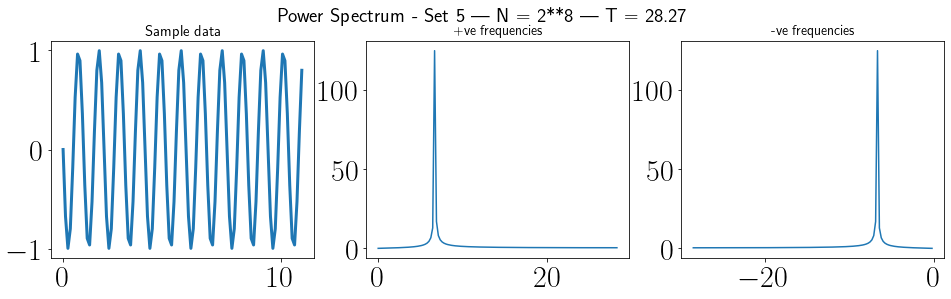

sampling : 512 |	freq res. : 0.049999999999999996 |	maxn. frequency : 25.599999999999998


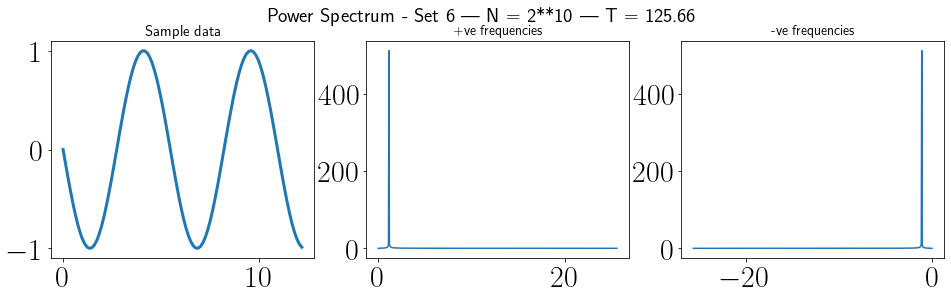

sampling : 2048 |	freq res. : 0.049999999999999996 |	maxn. frequency : 102.39999999999999


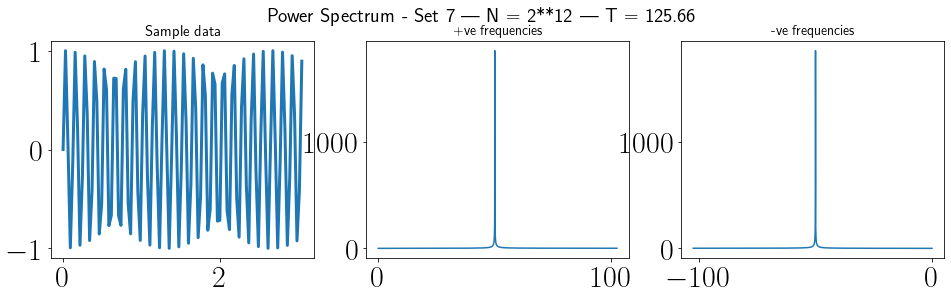

In [14]:
w=50          # signal frequency
Tp=2*np.pi/w  # signal time period
k=[5,8,12,7,8,10,12]          # intevals
t=[500,796,800,800/(2**5),900/(2**2),1000,1000]
i=[1,2,3,4,5,6,7]

for t,k,i in zip(t,k,i):
    T=t*Tp      # total time period
    N=2**k        # total no. of data points
    Nh=int(N/2)   # sampling the spectrum into equal two parts
    X,h=np.linspace(0,T,N, retstep=True)
    wo=2*np.pi/T  # frequency resolution
    wmax=wo*Nh    # max frequency for sampling
    print ('sampling :',Nh,'|\tfreq res. :', wo,'|\tmaxn. frequency :', wmax)
    Y=np.sin(w*X)
    Yp=np.abs(fft.fft(Y))
    Wp=np.arange(0,wmax,wo)  # taking the positive side
    Wn=np.arange(-wmax,0,wo) # taking the negative side
    fig,(ax,ax1,ax2)=plt.subplots(1,3,figsize=(16,4))
    plt.suptitle('Power Spectrum - Set %i | N = 2**%i | T = %0.2f'%(i,k,T),y=1.,fontsize=20)
    ax.plot(X[:100],Y[:100],linewidth=3)
    ax.set_title('Sample data',fontsize=15)
    ax1.plot(Wp,Yp[:Nh])
    ax1.set_title('+ve frequencies',fontsize=14)
    ax2.plot(Wn,Yp[Nh:])
    ax2.set_title('-ve frequencies',fontsize=14)
    plt.savefig("fft.png")
    plt.show()

### Comments :
1. The number of data points should always be greater than or equal to the length of 𝜔/2𝜋 
2.Choosing very short data point to compute can lead to poor results, particularly if we have short epochs               
and only if we are interested in analyzing lower frequencies.
3.Large data point can result in finer resolution of power spectrum, but can lead to noisy power spectrum.                 
One needs to strike a balance here, depending on the frequencies of interest.

Q7. Calculate the FFT of a signal $F(t)=\sin t + \sin \pi t $. Plot the signal and its power spectrum. Write
your comments.

sampling : 64 |	freq res. : 0.001388888888888889 |	maxn. frequency : 0.08888888888888889


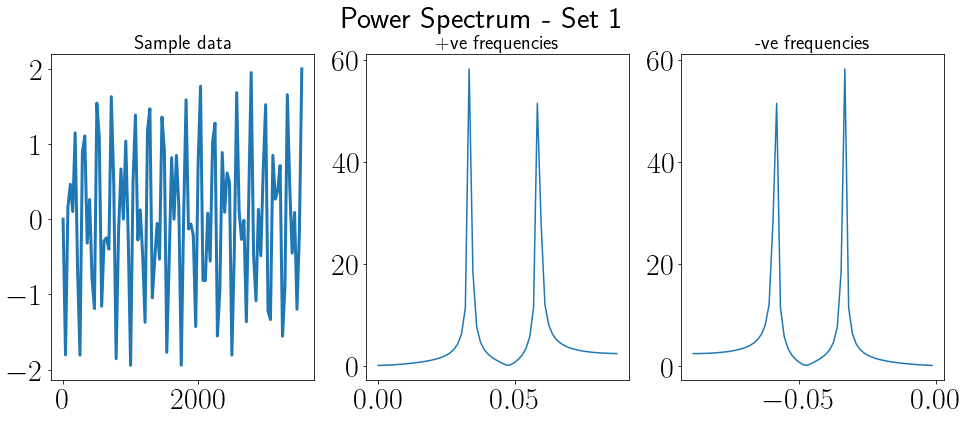

sampling : 128 |	freq res. : 0.0013333333333333333 |	maxn. frequency : 0.17066666666666666


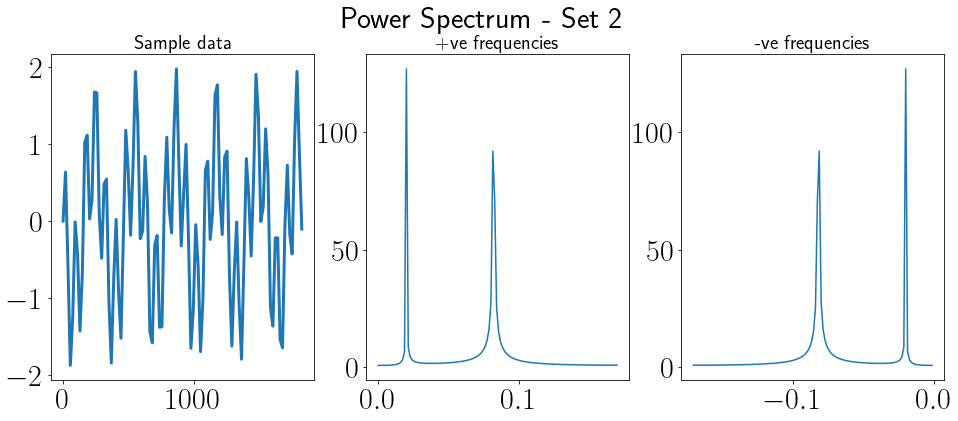

sampling : 128 |	freq res. : 0.0012903225806451613 |	maxn. frequency : 0.16516129032258065


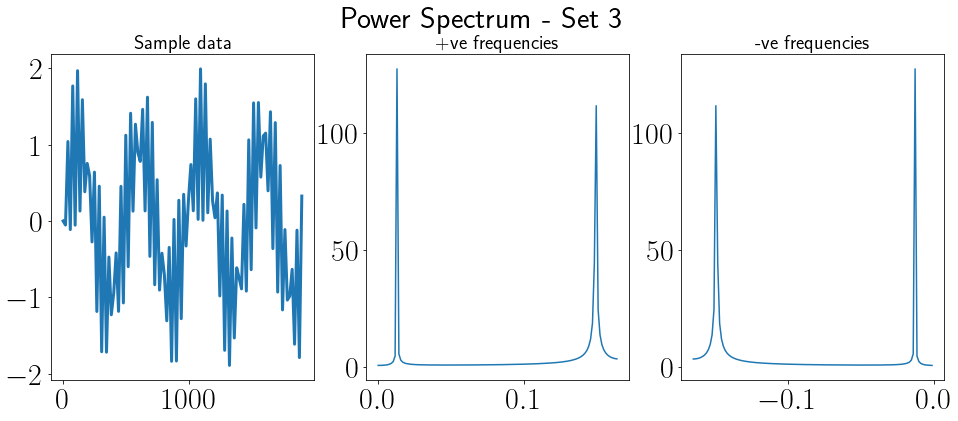

sampling : 256 |	freq res. : 0.00125 |	maxn. frequency : 0.32


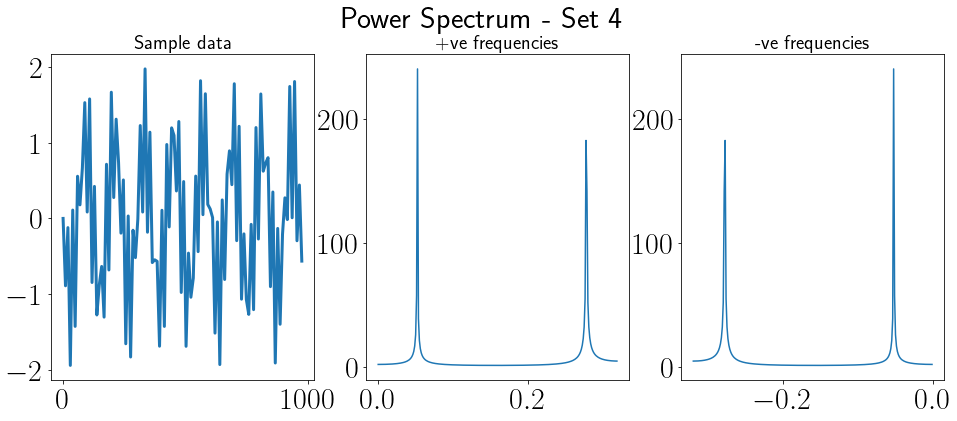

sampling : 256 |	freq res. : 0.001 |	maxn. frequency : 0.256


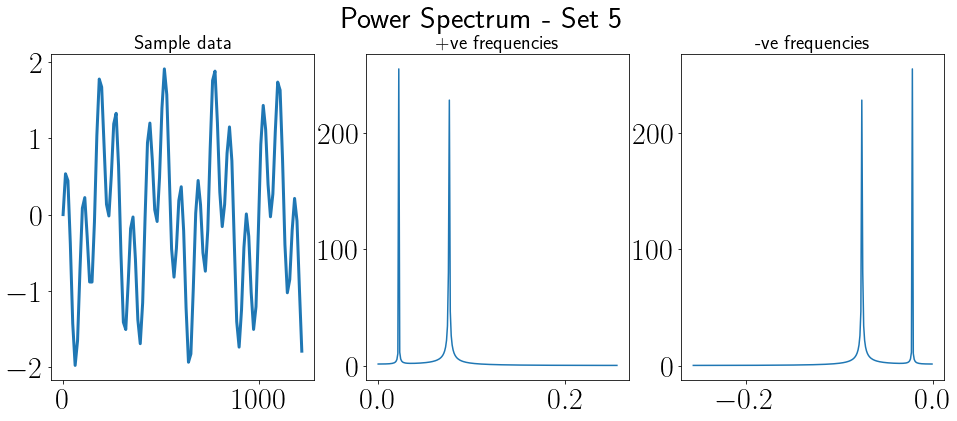

sampling : 512 |	freq res. : 0.001 |	maxn. frequency : 0.512


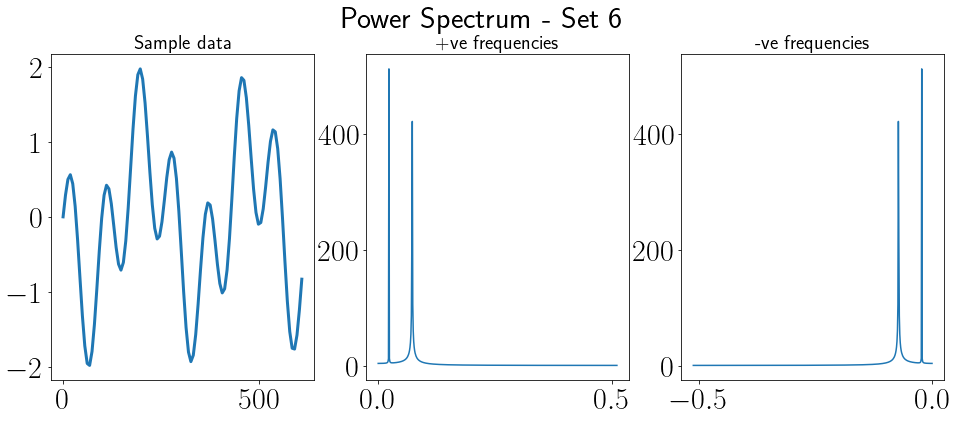

sampling : 1024 |	freq res. : 0.0007692307692307692 |	maxn. frequency : 0.7876923076923077


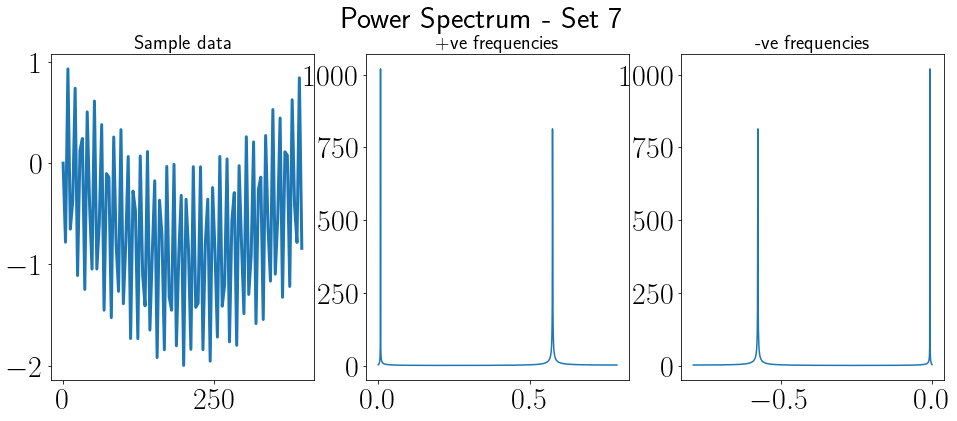

In [15]:
k=[7,8,8,9,9,10,11]          # intevals
t=[720,750,775,800,1000,1000,1300]
i=[1,2,3,4,5,6,7]

for t,k,i in zip(t,k,i):
    w=1          # signal frequency
    Tp=2*np.pi/w  # signal time period
    T=t*Tp      # total time period
    N=2**k        # total no. of data points
    Nh=int(N/2)   # sampling the spectrum into equal two parts
    X,h=np.linspace(0,T,N, retstep=True)
    wo=2*np.pi/T  # frequency resolution
    wmax=wo*Nh    # max frequency 
    print ('sampling :',Nh,'|\tfreq res. :', wo,'|\tmaxn. frequency :', wmax)
    Y=np.sin(w*X) + np.sin(np.pi*X)
    YP=np.abs(fft.fft(Y))
    WP=np.arange(0,wmax,wo)  # taking the positive side
    WN=np.arange(-wmax,0,wo) # taking the negative side
    fig,(ax,ax1,ax2)=plt.subplots(1,3,figsize=(16,6))
    plt.suptitle('Power Spectrum - Set %i'%i,y=0.99,fontsize=30)
    ax.plot(X[:100],Y[:100],linewidth=3)
    ax.set_title('Sample data',fontsize=20)
    ax1.plot(WP,YP[:Nh])
    ax1.set_title('+ve frequencies',fontsize=20)
    ax2.plot(WN,YP[Nh:])
    ax2.set_title('-ve frequencies',fontsize=20)
    plt.show()

### Comment:
1.Highly overlapping  data points does not guarantee smoother power spectrum estimates due to high correlation between the data points